<a href="https://colab.research.google.com/github/jaguzman/FundamentosEnHerramientasDeTransformacionDigital/blob/master/Unidad%203%20-%20Aprendizaje%20de%20m%C3%A1quinas/2_Aprendizaje%20Supervisado/KVecinosMasCercanos_ActividadTumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN

**Datos de características de tomores**

Se cuenta con una base de datos de pacientes a los que se le realizaron análisis de tumores y se generó un diagnóstico a partir de las características.


**Objetivo**

Crear un modelo de clasificación, basado en KNN, que prediga si un tumor es benigno o maligno.

**ACTIVIDAD**

1.  Importar librerías
2.  Importar la base de datos
3.  Realizar la descripción y analítica de datos
4.  Preparar de los datos para el algoritmo
5.  Crear un modelo clasificador basado en KNN


**1. Importar Librerías**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**2. Base de datos**

In [ ]:
# import data
data = pd.read_csv("https://raw.githubusercontent.com/jaguzman/dataSets/master/datasets/Classification-data.csv",
    sep = ',',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.')     # separador de los decimales para números
# Información de la base de datos
print(data.__())
# Encabezado de la base de datos
print(data.__())
#print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Eliminar las columnas 'id', 'Unnamed: 32'
data.drop(["__","__"],axis=1,inplace=True)
# Imrimir los últimos 5 datos 'tail'
data.__()
# malignant = M  kotu huylu tumor
# benign = B     iyi huylu tumor

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


**3. Descripción y analítica de datos**

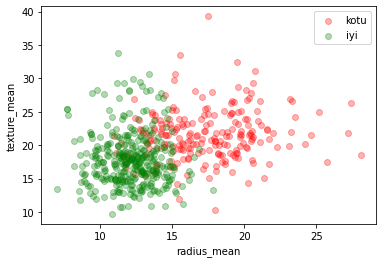

In [ ]:
# %%
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "__"]
# scatter plot
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="kotu",alpha= 0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="iyi",alpha= 0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

**4. Preparar los datos para el algoritmo**

In [ ]:
# %%
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["__"],axis=1)
# %%
# normalization 
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [ ]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = __,random_state=1)

**5. Modelo de KNN**

In [ ]:
# knn model
knn = KNeighborsClassifier(n_neighbors = __) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {} ".format(3,knn.score(x_test,y_test)))

 3 nn score: 0.9532163742690059 


**6. Otros análisis**

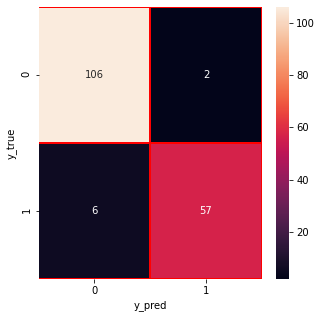

In [ ]:
#%% confusion matrix
y_pred = knn.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true,y_pred)

# %% cm visualization
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
# %%
# knn model con vecinos de 8
knn = KNeighborsClassifier(n_neighbors = 8) # n_neighbors = k
# Entrenar el modelo
knn.__(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {} ".format(3,knn.score(__,__)))

 3 nn score: 0.9649122807017544 


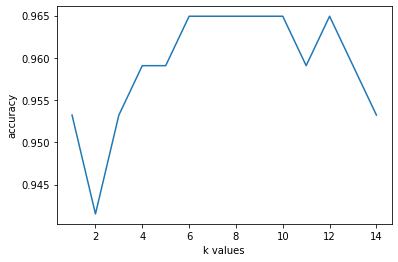

In [ ]:
# %%
# Encontrar el mejor k
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()